# Project: NLP for Cleantech
### Stage 1: Data cleaning, preprocessing, and exploratory data analysis (EDA) including topic modeling
#### Part 2: EDA and topic modeling
Authors: Esin, Sabrina

### 1. Exploratory Data Analysis (EDA)

#### Loading the preprocessed dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
!pip install pyLDAvis==2.1.2

In [ ]:
%%capture
!pip install top2vec
!pip install top2vec[sentence_encoders]
!pip install top2vec[sentence_transformers]
!pip install top2vec[indexing]

In [ ]:
%%capture
!pip install bertopic

In [ ]:
import pandas as pd
df = pd.read_parquet("/content/drive/MyDrive/CLT Project/NLP Stage 1/Stage1_Preprocessed.csv")
df

,title,content,text,cleaned_text,tokenized
0,Qatar to Slash Emissions as LNG Expansion Adva...,"[""Qatar Petroleum ( QP) is targeting aggressiv...",Qatar to Slash Emissions as LNG Expansion Adva...,Qatar to Slash Emissions as LNG Expansion Adva...,"[qatar, slash, emission, expansion, advance, q..."
1,India Launches Its First 700 MW PHWR,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL)...","India Launches Its First 700 MW PHWR [""• Nucle...",India Launches Its First 700 MW PHWR Nuclear...,"[india, launch, first, nuclear, power, india, ..."
2,New Chapter for US-China Energy Trade,"[""New US President Joe Biden took office this ...","New Chapter for US-China Energy Trade [""New US...",New Chapter for US China Energy Trade New US ...,"[chapter, china, energy, trade, president, bid..."
3,Japan: Slow Restarts Cast Doubt on 2030 Energy...,"[""The slow pace of Japanese reactor restarts c...",Japan: Slow Restarts Cast Doubt on 2030 Energy...,Japan Slow Restarts Cast Doubt on 2030 Energy...,"[japan, restart, doubt, energy, japanese, reac..."
4,NYC Pension Funds to Divest Fossil Fuel Shares,"[""Two of New York City's largest pension funds...",NYC Pension Funds to Divest Fossil Fuel Shares...,NYC Pension Funds to Divest Fossil Fuel Shares...,"[pension, fund, divest, fossil, share, large, ..."
...,...,...,...,...,...
9585,Strata Clean Energy Nets $ 300 Million in Fund...,['Strata Clean Energy has closed a $ 300 milli...,Strata Clean Energy Nets $ 300 Million in Fund...,Strata Clean Energy Nets 300 Million in Fund...,"[stratum, clean, energy, million, funding, sup..."
9586,Orsted Deploying SparkCognition Renewable Suit...,['Global renewable energy developer Ørsted is ...,Orsted Deploying SparkCognition Renewable Suit...,Orsted Deploying SparkCognition Renewable Suit...,"[orsted, deploy, sparkcognition, renewable, su..."
9587,Veolia Has Plans for 5 MW of Solar in Arkansas,"['Veolia North America, a provider of environm...",Veolia Has Plans for 5 MW of Solar in Arkansas...,Veolia Has Plans for 5 MW of Solar in Arkansas...,"[veolia, plan, solar, arkansas, veolia, north,..."
9588,"SunEdison: Too Big, Too Fast?",['Once the self-proclaimed “ leading renewable...,"SunEdison: Too Big, Too Fast? ['Once the self-...",SunEdison Too Big Too Fast Once the self p...,"[sunedison, proclaim, leading, renewable, powe..."


#### 1.1. Create a word count

In [ ]:
def count_words(article):
    return len(article)
df["word_count"] = df.tokenized.apply(count_words)
df

,title,content,text,cleaned_text,tokenized,word_count
0,Qatar to Slash Emissions as LNG Expansion Adva...,"[""Qatar Petroleum ( QP) is targeting aggressiv...",Qatar to Slash Emissions as LNG Expansion Adva...,Qatar to Slash Emissions as LNG Expansion Adva...,"[qatar, slash, emission, expansion, advance, q...",187
1,India Launches Its First 700 MW PHWR,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL)...","India Launches Its First 700 MW PHWR [""• Nucle...",India Launches Its First 700 MW PHWR Nuclear...,"[india, launch, first, nuclear, power, india, ...",263
2,New Chapter for US-China Energy Trade,"[""New US President Joe Biden took office this ...","New Chapter for US-China Energy Trade [""New US...",New Chapter for US China Energy Trade New US ...,"[chapter, china, energy, trade, president, bid...",329
3,Japan: Slow Restarts Cast Doubt on 2030 Energy...,"[""The slow pace of Japanese reactor restarts c...",Japan: Slow Restarts Cast Doubt on 2030 Energy...,Japan Slow Restarts Cast Doubt on 2030 Energy...,"[japan, restart, doubt, energy, japanese, reac...",320
4,NYC Pension Funds to Divest Fossil Fuel Shares,"[""Two of New York City's largest pension funds...",NYC Pension Funds to Divest Fossil Fuel Shares...,NYC Pension Funds to Divest Fossil Fuel Shares...,"[pension, fund, divest, fossil, share, large, ...",185
...,...,...,...,...,...,...
9585,Strata Clean Energy Nets $ 300 Million in Fund...,['Strata Clean Energy has closed a $ 300 milli...,Strata Clean Energy Nets $ 300 Million in Fund...,Strata Clean Energy Nets 300 Million in Fund...,"[stratum, clean, energy, million, funding, sup...",174
9586,Orsted Deploying SparkCognition Renewable Suit...,['Global renewable energy developer Ørsted is ...,Orsted Deploying SparkCognition Renewable Suit...,Orsted Deploying SparkCognition Renewable Suit...,"[orsted, deploy, sparkcognition, renewable, su...",204
9587,Veolia Has Plans for 5 MW of Solar in Arkansas,"['Veolia North America, a provider of environm...",Veolia Has Plans for 5 MW of Solar in Arkansas...,Veolia Has Plans for 5 MW of Solar in Arkansas...,"[veolia, plan, solar, arkansas, veolia, north,...",169
9588,"SunEdison: Too Big, Too Fast?",['Once the self-proclaimed “ leading renewable...,"SunEdison: Too Big, Too Fast? ['Once the self-...",SunEdison Too Big Too Fast Once the self p...,"[sunedison, proclaim, leading, renewable, powe...",785


#### 1.2. Define term frequency per article

In [ ]:
def word_frequency(article):
    word_freq = {}
    for word in article:
        if word not in word_freq:
            word_freq[word] = 1
        elif word in word_freq:
            word_freq[word] += 1
    return(word_freq)

df["word_frequency"] = df.tokenized.apply(word_frequency)

#Check on outcome:
print(df.loc[0, "word_frequency"])

{'qatar': 6, 'slash': 1, 'emission': 4, 'expansion': 6, 'advance': 1, 'petroleum': 1, 'target': 3, 'aggressive': 1, 'greenhouse': 1, 'prepare': 2, 'launch': 1, 'phase': 7, 'plan': 2, 'million': 9, 'latest': 1, 'sustainability': 1, 'report': 1, 'publish': 1, 'wednesday': 1, 'goal': 1, 'include': 1, 'reducing': 1, 'intensity': 3, 'facility': 4, 'upstream': 2, 'least': 1, 'company': 3, 'aim': 1, 'reduce': 1, 'flare': 2, 'across': 2, 'raise': 2, 'carbon': 2, 'capture': 2, 'storage': 1, 'ambition': 1, 'know': 2, 'north': 2, 'field': 2, 'project': 3, 'south': 1, 'capacity': 3, 'currently': 1, 'production': 1, 'around': 2, 'eye': 1, 'eliminate': 1, 'routine': 1, 'methane': 2, 'limited': 1, 'setting': 1, 'build': 1, 'gigawatts': 1, 'solar': 2, 'energy': 1, 'siraj': 1, 'power': 1, 'month': 1, 'little': 1, 'massive': 1, 'mcdermott': 1, 'international': 2, 'award': 3, 'front': 1, 'engineering': 1, 'design': 1, 'contract': 3, 'offshore': 1, 'wellhead': 1, 'platform': 1, 'construction': 3, 'train':

#### 1.3. Term frequency on all articles

In [ ]:
#Merge all tokens into a list:
total_wordlist = []

for tokenlist in df.tokenized:
  for token in tokenlist:
    total_wordlist.append(token)

In [ ]:
#Term frequency:
from collections import Counter
count_all_words = dict(Counter(total_wordlist))
print(count_all_words)

{'qatar': 130, 'slash': 199, 'emission': 10040, 'expansion': 1314, 'advance': 3148, 'petroleum': 625, 'target': 3971, 'aggressive': 189, 'greenhouse': 1819, 'prepare': 683, 'launch': 2276, 'phase': 1670, 'plan': 4711, 'million': 9140, 'latest': 2472, 'sustainability': 2127, 'report': 6230, 'publish': 5219, 'wednesday': 545, 'goal': 2067, 'include': 9637, 'reducing': 1485, 'intensity': 380, 'facility': 4845, 'upstream': 515, 'least': 1599, 'company': 18976, 'aim': 900, 'reduce': 6169, 'flare': 133, 'across': 5544, 'raise': 1135, 'carbon': 12291, 'capture': 3239, 'storage': 14704, 'ambition': 803, 'know': 1225, 'north': 3847, 'field': 5248, 'project': 25768, 'south': 3614, 'capacity': 8088, 'currently': 2939, 'production': 9360, 'around': 5505, 'eye': 57, 'eliminate': 635, 'routine': 69, 'methane': 1180, 'limited': 1314, 'setting': 3663, 'build': 5296, 'gigawatts': 464, 'solar': 36181, 'energy': 65895, 'siraj': 3, 'power': 23227, 'month': 4411, 'little': 1175, 'massive': 1148, 'mcdermott

#### 1.4. WordCloud of frequent terms in all articles

The wordcloud shows the tokenized words in different sizes. If a word is written in a bigger size, it means that the word has appeared more often. The words Energy and Solar are the two biggest words. This can also be displayed in different ways as it is shown later.

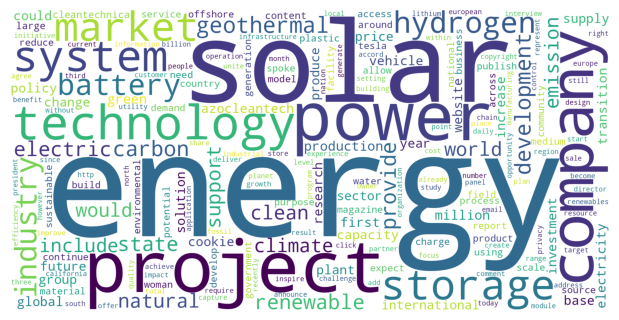

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=2000, height=1000,
                      background_color='white', min_font_size=10)

# Generate word cloud from frequencies
wordcloud.generate_from_frequencies(count_all_words)

# Plot the WordCloud image
plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### 1.5. Word counts in the document
##### 1.5.1. Distribution of word counts

In [ ]:
print(count_all_words.values())

dict_values([130, 199, 10040, 1314, 3148, 625, 3971, 189, 1819, 683, 2276, 1670, 4711, 9140, 2472, 2127, 6230, 5219, 545, 2067, 9637, 1485, 380, 4845, 515, 1599, 18976, 900, 6169, 133, 5544, 1135, 12291, 3239, 14704, 803, 1225, 3847, 5248, 25768, 3614, 8088, 2939, 9360, 5505, 57, 635, 69, 1180, 1314, 3663, 5296, 464, 36181, 65895, 3, 23227, 4411, 1175, 1148, 31, 7361, 1680, 2259, 2125, 4562, 2108, 5371, 58, 1917, 3038, 543, 1393, 1022, 112, 1030, 632, 39, 732, 384, 1272, 256, 205, 2037, 630, 4145, 5303, 104, 737, 350, 7560, 3647, 475, 120, 37, 155, 392, 1162, 3571, 525, 136, 73, 106, 3862, 868, 4013, 2168, 83, 445, 72, 10028, 393, 2140, 844, 1, 1, 7, 1473, 9241, 2252, 4, 17, 4, 795, 11258, 41, 2511, 738, 3, 5017, 34, 1141, 6297, 690, 1, 2716, 600, 106, 1, 718, 468, 2419, 101, 1641, 2414, 3481, 2906, 30, 7626, 70, 2, 3, 1434, 2185, 7871, 484, 3429, 4, 1807, 3093, 3767, 212, 1295, 4503, 7630, 1023, 191, 1768, 1114, 107, 142, 3808, 2128, 331, 825, 1087, 1423, 1110, 801, 943, 50, 2255, 384

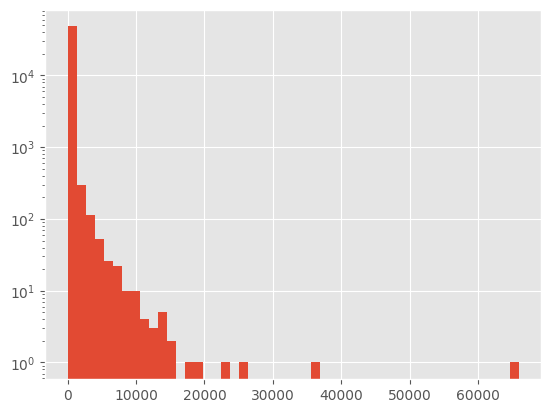

In [ ]:
plt.style.use('ggplot')
plt.hist(count_all_words.values(),bins=50, log = True)
plt.show()

You can see a strong right skewed distribution. Log of total word counts can be used here to visually diminish the large differences in counts.

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot
from IPython.core.interactiveshell import InteractiveShell

trace1 = go.Box(
    y= [x for x in count_all_words.values()],
    name = "word count",
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)
data = [trace1]
layout = go.Layout(
    title = "Total Word count Boxplot"
)

fig = go.Figure(data=data,layout=layout)
fig.show(renderer="colab")


The flat box in the boxplot shows again the large number of low (close to zero) word counts. The minimum count and the lower fence of the box are identical (1), and the upper border of the box is at 10 which tells us that 75% of the word counts lay between 1 and 10. The boxplot reveals that the word counts above the box mostly go until ca. 15'000. Visually speaking, counts beyond this value could be considered as extreme outliers. Two word counts at ca. 18'000, one at ca. 23'000, one at ca. 25'000, one at ca. 36'000, and ultimately, one at ca. 65'000 can be identified.

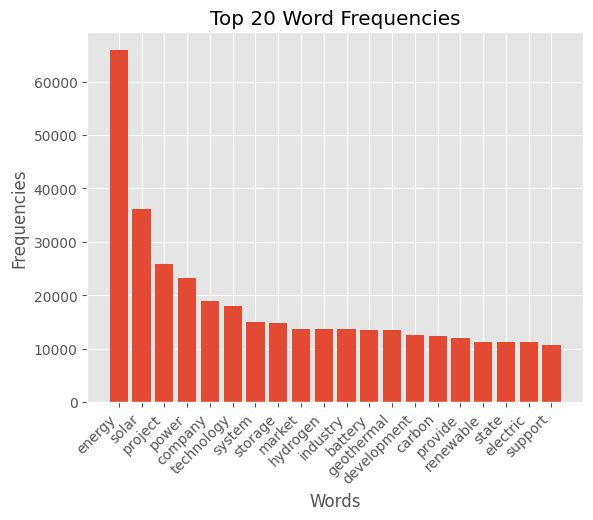

In [ ]:
#Top 20 Word Frequencies

import matplotlib.pyplot as plt
words = list(count_all_words.keys())
frequencies = list(count_all_words.values())

sorted_indices = sorted(range(len(frequencies)), key=lambda k: frequencies[k], reverse=True)
top_n = 20 #can be adjusted

plt.bar(range(top_n), [frequencies[i] for i in sorted_indices[:top_n]], tick_label=[words[i] for i in sorted_indices[:top_n]])
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Top {} Word Frequencies'.format(top_n))
plt.xticks(rotation=45, ha='right')
plt.show()

The top 20 words show a big difference between the most often used word "energy" with a frequency over 65'000. "Solar" is the second most used word with around 35'000 appearances.

#### 1.6. Article lengths


Text(0.5, 1.0, 'Article Length Distribution')

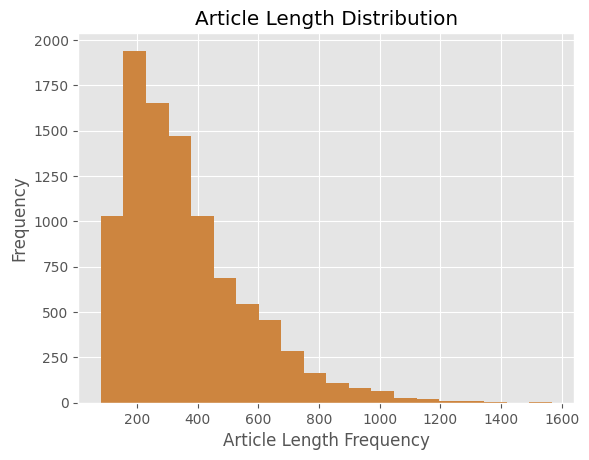

In [ ]:
plt.style.use('ggplot')
df.word_count.plot(kind='hist', bins=20, color='peru')
plt.xlabel('Article Word Count')
plt.xlabel('Article Length Frequency')
plt.title('Article Length Distribution')

The histogram visualizes the distribution of the article lengths in the whole dataset. We can see a right skewed distribution with a maximum value of about 1900. It represents an article in the dataset that has this approximate number of words.

In [ ]:
trace1 = go.Box(
    y= [x for x in df.word_count],
    name = "word count",
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
data = [trace1]
layout = go.Layout(
    title = "Article Length Boxplot"
)

fig = go.Figure(data=data,layout=layout)
fig.show(renderer="colab")
#iplot(fig, filename = "Word count Boxplot")

The boxplot of the distribution of article lengths gives us further insights. It shows that the shortest article in the dataset has 82 words. The box ranges from 208 to 460 words which means that 50 % of the articles in the dataset have a word count between these values. The upper fence of the boxplot is situated at 838. The visual reveals that there are indeed many word counts that exceed this threshold and reach to a word count up until 1567. Outliers that are out of the upper/lower fence can be considered as extreme outliers. This characteristic, and the fact that the box is not centered underlines again the right skewedness of the distribution.

#### 1.7. Outliers and anomalies

It is already visible in the visualisations and mentioned before that there are some extreme values in the data. Especially the boxplot shows some outliers outside of the upper/lower fence. These outliers can be identified to give some further insights.

In [ ]:
descriptive_stats = df.describe()
print(descriptive_stats)

        word_count
count  9590.000000
mean    361.564025
std     203.066522
min      82.000000
25%     208.000000
50%     314.000000
75%     460.000000
max    1567.000000


Looking at the descriptive statistics of the word counts per article, we can see that the average article length is measured at ca. 361 words. The mean and median not being identical proves again that the word counts of articles in the dataset are not normally distributed. The Interquantile (IQR) method can be used to determine all the outliers. Values outside the range of Q1 - 1.5 * IQR and Q3 + 1.5 * IQR are considered outliers. Extreme outliers are in the range Q1 - 3 * IQR and Q3 + 3 * IQR.

In [ ]:
Q1 = df['word_count'].quantile(0.25)
Q3 = df['word_count'].quantile(0.75)
IQR = Q3 - Q1

outliers = (df['word_count'] < Q1 - 3 * IQR) | (df['word_count'] > Q3 + 3 * IQR)

print("Extreme Outliers:")
df[outliers]

Outliers:


,title,content,text,cleaned_text,tokenized,word_count,word_frequency
27,Capturing the Moment: Carbon Capture in the Am...,['President Biden’ s $ 2.25 trillion-plus Amer...,Capturing the Moment: Carbon Capture in the Am...,Capturing the Moment Carbon Capture in the Am...,"[capture, moment, carbon, capture, american, p...",1315,"{'capture': 65, 'moment': 1, 'carbon': 48, 'am..."
1473,"Sexy/Unsexy, Practical/Impractical: There Are ...",['What defines sexy? Lots of press. Frequent h...,"Sexy/Unsexy, Practical/Impractical: There Are ...",Sexy Unsexy Practical Impractical There Are ...,"[unsexy, practical, impractical, mutt, magnifi...",1228,"{'unsexy': 6, 'practical': 11, 'impractical': ..."
1476,"Sexy/Unsexy, Practical/Impractical: Decarboniz...",['Moving into the sexy but impractical quadran...,"Sexy/Unsexy, Practical/Impractical: Decarboniz...",Sexy Unsexy Practical Impractical Decarboniz...,"[unsexy, practical, impractical, decarbonize, ...",1289,"{'unsexy': 2, 'practical': 3, 'impractical': 4..."
1656,The Top 20 NREL Stories Of 2022,"['Throughout 2022, researchers, staff, and lea...",The Top 20 NREL Stories Of 2022 ['Throughout 2...,The Top 20 NREL Stories Of 2022 Throughout 20...,"[story, throughout, researcher, staff, leaders...",1352,"{'story': 3, 'throughout': 3, 'researcher': 12..."
1666,The Unused Energy All Around Us: How Rejected ...,['ChatGPT knows more stuff than you do. A lot ...,The Unused Energy All Around Us: How Rejected ...,The Unused Energy All Around Us How Rejected ...,"[unused, energy, around, reject, energy, green...",1217,"{'unused': 1, 'energy': 109, 'around': 3, 'rej..."
1869,Survey Shows Pathway To Speeding Up EV Adoptio...,"['Regardless of where we live, we should all h...",Survey Shows Pathway To Speeding Up EV Adoptio...,Survey Shows Pathway To Speeding Up EV Adoptio...,"[survey, show, pathway, speeding, adoption, ru...",1247,"{'survey': 11, 'show': 2, 'pathway': 1, 'speed..."
1884,6 Ways to Remove Carbon Pollution from the Atm...,"['Since the Industrial Revolution, humans have...",6 Ways to Remove Carbon Pollution from the Atm...,6 Ways to Remove Carbon Pollution from the Atm...,"[remove, carbon, pollution, atmosphere, since,...",1460,"{'remove': 14, 'carbon': 97, 'pollution': 2, '..."
2764,Introducing the World’ s Fastest Electric Vehi...,"[""By clicking `` Allow All '' you agree to the...",Introducing the World’ s Fastest Electric Vehi...,Introducing the World s Fastest Electric Vehi...,"[introduce, world, fast, electric, vehicle, ch...",1245,"{'introduce': 6, 'world': 15, 'fast': 8, 'elec..."
2993,The UN World Water Development Report 2022,"[""By clicking `` Allow All '' you agree to the...","The UN World Water Development Report 2022 [""B...",The UN World Water Development Report 2022 By...,"[world, water, development, report, click, all...",1504,"{'world': 15, 'water': 43, 'development': 18, ..."
3035,Tidal Stream Turbines: The Future of Clean Ene...,"[""By clicking `` Allow All '' you agree to the...",Tidal Stream Turbines: The Future of Clean Ene...,Tidal Stream Turbines The Future of Clean Ene...,"[tidal, stream, turbine, future, clean, energy...",1306,"{'tidal': 65, 'stream': 54, 'turbine': 57, 'fu..."


The outliers are clearly the ones with a high word count. No small word count is included in the dataFrame above. This shows again that there are more documents with a smaller wordcount in the whole dataframe.

In [ ]:
import numpy as np
word_frequencies = list(count_all_words.values())
# Calculate Q1 and Q3
Q1 = np.percentile(word_frequencies, 25)
Q3 = np.percentile(word_frequencies, 75)
IQR = Q3 - Q1

# threshold for identifying outliers
outliers_freq = [word for word, freq in count_all_words.items() if freq < Q1 - 3 * IQR or freq > Q3 + 3 * IQR]

print("Outliers:")
print(outliers_freq)
print(len(outliers))

Outliers:
['qatar', 'slash', 'emission', 'expansion', 'advance', 'petroleum', 'target', 'aggressive', 'greenhouse', 'prepare', 'launch', 'phase', 'plan', 'million', 'latest', 'sustainability', 'report', 'publish', 'wednesday', 'goal', 'include', 'reducing', 'intensity', 'facility', 'upstream', 'least', 'company', 'aim', 'reduce', 'flare', 'across', 'raise', 'carbon', 'capture', 'storage', 'ambition', 'know', 'north', 'field', 'project', 'south', 'capacity', 'currently', 'production', 'around', 'eye', 'eliminate', 'routine', 'methane', 'limited', 'setting', 'build', 'gigawatts', 'solar', 'energy', 'power', 'month', 'little', 'massive', 'international', 'award', 'front', 'engineering', 'design', 'contract', 'offshore', 'wellhead', 'platform', 'construction', 'train', 'submit', 'september', 'judge', 'expensive', 'schedule', 'shortlist', 'contractor', 'ask', 'saving', 'consultancy', 'rystad', 'estimate', 'worth', 'billion', 'expect', 'shortly', 'select', 'foreign', 'investment', 'partner',

After looking at the word count, it is also possible to determine the outliers of the frequency of the words. In the first dataframe all the words are listed with the number of appearances. This is calculated by adding all the tokenized words together. These words have also outliers which are listed above. In total 9'590 outliers were detected. But there are also more different words with a frequency in the dataFrame than numbers in the column word_count.

### 2. Topic Modeling


#### 2.1.  Latent Dirichlet Allocation - LDA

##### 2.1.1. Define Topics by creating LDA model - 5 Topics





In [ ]:
#Create a dict from the article content and use the bag-of-words model
from gensim import corpora
dictionary = corpora.Dictionary(df.tokenized)
corpus = [dictionary.doc2bow(text) for text in df.tokenized]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')


In [ ]:
# Create LDA model to define 5 topics
import gensim
NUM_TOPICS = 5
ldamodel5 = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel5.save('model5.gensim')
topics5 = ldamodel5.print_topics(num_words=4)
for topic in topics5:
    print(topic)

(0, '0.022*"solar" + 0.016*"battery" + 0.015*"website" + 0.014*"magazine"')
(1, '0.013*"azocleantech" + 0.010*"plastic" + 0.009*"technology" + 0.008*"woman"')
(2, '0.016*"energy" + 0.011*"hydrogen" + 0.009*"natural" + 0.008*"price"')
(3, '0.015*"electric" + 0.013*"vehicle" + 0.010*"cleantechnica" + 0.009*"charge"')
(4, '0.043*"energy" + 0.033*"solar" + 0.020*"project" + 0.014*"geothermal"')


Using LDA, we have defined 5 topics in the dataset. This could be a way to interpret these topics: <br>
**Topic 0:** This topic seems to be related to websites or magazines regarding solar batteries. <br>
**Topic 1:** This topic seems to be related to (cleaning) technology and woman. <br>
**Topic 2:** This topic seems to be related to the prices of natural energy systems and hydrogen <br>
**Topic 3:** This topic seems to be related to electric vehicles and charging infrastructure <br>
**Topic 4:** This topic seems to be related to solar energy systems including geothermal.

**Quality Evaluation Model 5**



In [ ]:
#LDA model with 5 topics
# Compute Perplexity
print('\nPerplexity: ', ldamodel5.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score (between 0-1). Higher the better
coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel5, texts=df.tokenized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.61643813285156

Coherence Score:  0.4864026667661916


The Perplexity of the model with 5 topics is -7.6164. The coherence score shows an effectiveness of 49%. In general the lower the perplexity the better and a higher coherence score means it is a better model.

**Visualization of Topics - Model 5**

In [ ]:
#!pip install pyLDAvis==2.1.2

In [ ]:
#Visualization of Model5 with 5 Topics

dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

The intertopic distance map reveals that topic 3 and 5 are showing a strong overlap. This can be an indication to explore a model with a higher number of topics. In the following, the better model will the adjusted to further increase the quality.

##### 2.1.2. Define Topics by creating LDA model - 10 Topics

In [ ]:
# Adjusted LDA model to define 10 topics
import gensim
NUM_TOPICS = 10
ldamodel10 = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel10.save('model10.gensim')
topics10 = ldamodel10.print_topics(num_words=4)
for topic in topics10:
    print(topic)

(0, '0.023*"electric" + 0.021*"vehicle" + 0.017*"cleantechnica" + 0.015*"charge"')
(1, '0.057*"geothermal" + 0.038*"energy" + 0.018*"project" + 0.011*"development"')
(2, '0.037*"energy" + 0.028*"solar" + 0.021*"power" + 0.019*"project"')
(3, '0.025*"energy" + 0.023*"hydrogen" + 0.018*"carbon" + 0.015*"company"')
(4, '0.052*"solar" + 0.047*"energy" + 0.019*"project" + 0.013*"state"')
(5, '0.009*"climate" + 0.008*"could" + 0.008*"change" + 0.008*"water"')
(6, '0.037*"offshore" + 0.015*"floating" + 0.014*"project" + 0.011*"turbine"')
(7, '0.022*"natural" + 0.021*"price" + 0.014*"market" + 0.010*"daily"')
(8, '0.027*"solar" + 0.017*"system" + 0.017*"magazine" + 0.014*"website"')
(9, '0.023*"azocleantech" + 0.018*"plastic" + 0.015*"woman" + 0.014*"spoke"')


**Quality Evaluation Model 10**

In [ ]:
#LDA model with 10 topics
# Compute Perplexity
print('\nPerplexity: ', ldamodel10.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score (between 0-1). Higher the better
coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel10, texts=df.tokenized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.717478046247006

Coherence Score:  0.4850736267984227


The coherence score shows that the model with 10 topics performs slighlty less good than the model with 5 topics.

**Visualization of Topics - Model 10**

In [ ]:
#Visualization of Model10 with 10 Topics

dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model10.gensim')
topic_term_dists_normalized = np.apply_along_axis(lambda x: x / x.sum(), 1, lda.get_topics())
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False, topic_term_dists=topic_term_dists_normalized)
pyLDAvis.display(lda_display)

The Intertopic Distance Map shows an overlap of topic 2,3,4 and 5. It is therefore sensible to go a step further and explore another model with a higher number of topics.

##### 2.1.3. Define Topics by creating LDA model - 15 Topics

In [ ]:
# Create LDA model to define 15 topics
import gensim
NUM_TOPICS = 15
ldamodel15 = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel15.save('model15.gensim')
topics15 = ldamodel15.print_topics(num_words=4)
for topic in topics15:
    print(topic)

(0, '0.020*"material" + 0.016*"water" + 0.013*"process" + 0.011*"waste"')
(1, '0.053*"energy" + 0.022*"technology" + 0.018*"project" + 0.015*"company"')
(2, '0.031*"azocleantech" + 0.023*"plastic" + 0.020*"woman" + 0.019*"spoke"')
(3, '0.026*"power" + 0.019*"energy" + 0.013*"system" + 0.012*"electricity"')
(4, '0.018*"energy" + 0.011*"country" + 0.010*"market" + 0.010*"government"')
(5, '0.015*"system" + 0.008*"design" + 0.008*"provide" + 0.008*"solution"')
(6, '0.063*"carbon" + 0.060*"emission" + 0.049*"climate" + 0.016*"change"')
(7, '0.055*"group" + 0.051*"medium" + 0.043*"offshore" + 0.036*"recharge"')
(8, '0.020*"tesla" + 0.013*"electric" + 0.013*"vehicle" + 0.012*"cleantechnica"')
(9, '0.097*"hydrogen" + 0.040*"green" + 0.023*"energy" + 0.013*"power"')
(10, '0.021*"magazine" + 0.020*"website" + 0.020*"solar" + 0.019*"battery"')
(11, '0.026*"electric" + 0.022*"battery" + 0.021*"vehicle" + 0.020*"charge"')
(12, '0.090*"solar" + 0.048*"energy" + 0.030*"project" + 0.016*"power"')
(13

**Quality Evaluation Model 15**

In [ ]:
#Adjusted LDA model with 15 topics
# Compute Perplexity
print('\nPerplexity: ', ldamodel15.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score (between 0-1). Higher the better
coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel15, texts=df.tokenized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.965661859798485

Coherence Score:  0.5323730473904916


**Visualization of Topics - Model 15**

In [ ]:
#Visualization of Model15 with 15 Topics

dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model15.gensim')
topic_term_dists_normalized = np.apply_along_axis(lambda x: x / x.sum(), 1, lda.get_topics())
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False, topic_term_dists=topic_term_dists_normalized)
pyLDAvis.display(lda_display)

The 15 topics show a higher coherence score and a lower perplexity. The visulisation shows an overlap of 1,11 and 13; 2,4,5,10,14 and 15. It is more overlaping but has better results than before with regard to coherence.

##### 2.1.4. Define Topics by creating LDA model - 20 Topics

In [ ]:
# Create LDA model to define 20 topics
import gensim
NUM_TOPICS = 20
ldamodel20 = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel20.save('model20.gensim')
#topics20 = ldamodel20.print_topics(num_words=4)
#for topic in topics20:
#    print(topic)

**Quality Evaluation Model 20**

In [ ]:
#Adjusted LDA model with 20 topics
# Compute Perplexity
print('\nPerplexity: ', ldamodel20.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score (between 0-1). Higher the better
coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel20, texts=df.tokenized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.306652813821536

Coherence Score:  0.5184535725744185


The 20 Topics did not bring any improvement when looking at the coherence score. However, the perplexity is higher.

**Visualization of Topics - Model 20**

In [ ]:
#Visualization of Model20 with 20 Topics

dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model20.gensim')
topic_term_dists_normalized = np.apply_along_axis(lambda x: x / x.sum(), 1, lda.get_topics())
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False, topic_term_dists=topic_term_dists_normalized)
pyLDAvis.display(lda_display)

##### 2.1.5. LDA Topic Modeling - Conclusion

We have created four LDA models for the cleantech data. The process has shown slight changes in perplexity scores and coherence scores. Although an increase in the amount of topics has resulted in a lower perplexity score, there is a present risk of not being able to obtain human interpretable topics if one aims at minimizing the perplexity score. On the other side, as the coherence score stands for the degree of semantic similarity between high scoring words in a topic, it can be said that this measure can be seen as a reliable mean of quality judgement. Concludingly, it can be said that the LDA model with 15 topics performed best with a coherence score of 0.53.

#### 2.2. Non-negative Matrix Factorization - NMF


In [ ]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize

In [ ]:
#create design matrix:

#the count vectorizer module needs string inputs, not array, so they can be joined with a space:
tokens_as_string = [' '.join(text) for text in df.tokenized]

In [ ]:
# Obtain a Counts design matrix: matrix of size (Documents x Features),
# the value of a cell is the number of times the feature (= word) appears in that document.
vectorizer = CountVectorizer(analyzer='word', max_features=5000) # take the top 5000 best features that can contribute to the model
x_counts = vectorizer.fit_transform(tokens_as_string)

In [ ]:
# setting a TfIdf Transformer and transforming the counts with the model:
transformer = TfidfTransformer(smooth_idf=False)
x_tfidf = transformer.fit_transform(x_counts)

In [ ]:
# normalizing the TfIdf values to unit length for each row:
xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

In [ ]:
#Creating a NMF model and fitting with the tokens
num_topics = 10
model = NMF(n_components=num_topics, init='nndsvd')
model.fit(xtfidf_norm)

NMF(init='nndsvd', n_components=10)

In [ ]:
# Function to iterate over each topic to obtain the most important scoring words in each cluster, and to return as final df:
def get_nmf_topics(model, n_top_words):

    #the word ids obtained need to be reverse-mapped to the words so the topic names can be printed:
    feat_names = vectorizer.get_feature_names_out()

    word_dict_nmf = {}
    for i in range(num_topics):

        #for each topic, obtain the largest values, and add the words they map to into the dictionary:
        words_ids = model.components_[i].argsort()[:-n_top_words - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict_nmf['Topic # ' + '{:02d}'.format(i+1)] = words

    return pd.DataFrame(word_dict_nmf)

In [ ]:
# Calling the function with the model and selected amount of most relevant terms per topic:
get_nmf_topics(model, 10)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,solar,azocleantech,geothermal,medium,cleantechnica,magazine,hydrogen,natural,battery,energy
1,energy,plastic,energy,recharge,tesla,website,green,daily,storage,offshore
2,project,woman,heating,group,electric,cookie,ammonia,price,energy,carbon
3,power,spoke,project,privacy,vehicle,consent,production,shale,system,project
4,community,inspire,drilling,responsible,sale,delete,produce,email,lithium,climate
5,industry,planet,resource,variety,plugin,setting,carbon,password,power,emission
6,renewable,interview,development,publication,charge,reuse,energy,mexico,charge,renewable
7,panel,organization,source,secure,model,solar,steel,drilling,solution,government
8,utility,international,power,information,share,personal,power,topic,inverter,investment
9,state,provide,well,website,publish,purpose,emission,market,technology,power


##### 2.2.1 Evaluation of NMF Model

The dataframe output above gives a first glimpse of the topics found showing the 10 most related tokens from the article contents. <br>
However, it can also be useful to go a step further and investigate which articles in the dataset show the strongest connection to the defined topics.<br>
This is done in the following by  transforming the created tfidf-matrix into the nmf-embedding to find out which articles have the strongest link to each topic:

In [ ]:
nmf_embedding = model.transform(x_tfidf)
nmf_embedding = (nmf_embedding - nmf_embedding.mean(axis=0))/nmf_embedding.std(axis=0)

In [ ]:
import numpy as np
top_idx = np.argsort(nmf_embedding,axis=0)[-3:]

count = 1
for idxs in top_idx.T:
    print("\nTopic {}:".format(count))
    for idx in idxs:
        print(df.iloc[idx]['title'])
    count += 1


Topic 1:
TEP Chooses Solar FlexRack Trackers for AZ Community Solar Project
PCL Construction Targets North American Market with New PCL Solar Unit
Gas South Commits Fifty Million to Solar Initiatives

Topic 2:
Arcadia Biosciences: Quotes, Address, Contact
Ioannou Alternative Energy: Quotes, Address, Contact
ABS Alaskan, Inc.: Quotes, Address, Contact

Topic 3:
OPINION: Geothermal in the UK - News for the Energy Sector
Japan sees surge of small-scale geothermal power plants
White Paper published on deep geothermal potential in the UK

Topic 4:
'Significant step ': Shell grows onshore wind footprint with stake in giga-scale Australian
BlueFloat unveils new gigawatt offshore wind plan as Australian election'shifts narrative '
Gulf of Mexico wind 'could power 3m homes by 2030 ' as US marks out waters for 8.5GW of plant

Topic 5:
Top Non-Tesla Electric Cars In USA Had Under 30,000 Sales In 2021
Fast Growing EV Sales Around The World In 2022 — Charts!
Top Highlights of World EV Sales in 202

Comparing the dataframe of tokens associated with a topic and the article titles in the previous output, we can see that the NMF model achieved to build sensible and human-interpretable connections to form the topics for this dataset. <br>
Due to a clear distinction between all the identified topics in the model, we conclude that the results obtained from NMF are more in line with human judgment, thereby outperforming LDA in general. In addition, the NMF modeling technique has proven itself to be far more efficient in the aspect of computational efficiency.

#### 2.3. Top2Vec

To train the Top2Vec model a list of all the tokenized cleaned documents is needed. The speed can be set to "fast-learn", "learn" or "deep-learn". "Fast-learn" is the fastest approach. With "learn" the quality should already be quite good and the highest quality is achieved if "deep-learn" is used. It will also take the most time to train such a model. A higher amount of workers makes the training of the model also faster.

In [ ]:
from top2vec import Top2Vec
tokens_top  = [' '.join(tokens) for tokens in df['tokenized']]

model = Top2Vec(tokens_top,speed="learn", workers=4)
model.get_num_topics()

2023-11-29 11:25:21,698 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2023-11-29 11:25:38,481 - top2vec - INFO - Downloading universal-sentence-encoder-multilingual model
INFO:top2vec:Downloading universal-sentence-encoder-multilingual model
2023-11-29 11:25:47,714 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-11-29 11:35:38,233 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-11-29 11:36:32,792 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-11-29 11:36:33,117 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


55

In [ ]:
model.save("top2vec_model")

In [ ]:
#load the already saved model
from top2vec import Top2Vec
model = Top2Vec.load("top2vec_model")

##### 2.3.1 Analyse the Top2Vec Model

The following will show the number of topics that were found within the data.

In [ ]:
num = model.get_num_topics()
num

55

In [ ]:
topic_sizes, topic_nums = model.get_topic_sizes()

print("topic size:")
print(topic_sizes)

topic size:
[855 656 636 575 451 388 367 342 327 321 244 236 196 184 168 164 160 156
 156 144 142 142 132 130 114 113 106 106 103  91  91  90  89  88  86  84
  82  79  76  73  69  68  68  68  67  64  63  63  59  55  48  43  41  38
  33]


The topic size says how many words are similar to that one topic. The resulting numbers can be quite different. The topic size of the biggest topic is a lot more than the one with the least.

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(num)
print(topic_words)

[['solar' 'solarpower' 'solarapp' ... 'lightsource' 'subsidy' 'veolia']
 ['tesla' 'thinkgeoenergy' 'electricity' ... 'terawatt' 'electrolysis'
  'gasoline']
 ['geothermal' 'geoenergy' 'thinkgeoenergy' ... 'climate' 'renewableuk'
  'heatwaves']
 ...
 ['mexico' 'mexican' 'solarpower' ... 'hydrothermal' 'power' 'nation']
 ['volkswagen' 'tesla' 'toyota' ... 'germany' 'distribution'
  'competition']
 ['plastic' 'environmentally' 'environmental' ... 'greenwashing' 'global'
  'removal']]


When printing the topic words all the words in one topic can be seen. Since the topics are quite large, not all of the words ar shown.

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["science"], num_topics=5)
print(topic_nums)
print(topic_scores)

[ 9 54 33 17 30]
[0.14897685 0.1409089  0.13840708 0.12464911 0.1143636 ]


The two lists show the number of the topic and the related scores to the numbers. It shows the top 5 topics that are most similar to the keyword "science". Every random keyword could be inserted. The numbers in topc_nums are in descending order showing the most similar topic first and the 5th similar one last. The corresponding scores show how close they really are to the keyword.

To have a better understanding of the topics, they are displayed in the following wordclouds:

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["science"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic, background_color='white')

Output hidden; open in https://colab.research.google.com to view.

If the model determines a lot of different topics, it is also possible to reduce it to a certain number of preference. The following code will reduce the all the topics to 20 topics and will match all similar topics together.

In [ ]:
model.hierarchical_topic_reduction(num_topics=20)

[[32, 40, 0],
 [53, 41, 1],
 [45, 52, 24, 28, 31, 4],
 [2],
 [3],
 [27, 46, 7],
 [26, 37, 39, 23],
 [38, 19, 5],
 [35, 34, 47, 14],
 [13, 22, 44, 6],
 [29, 36, 50, 51, 15],
 [10],
 [12],
 [8],
 [49, 9],
 [20, 48, 21],
 [25, 16],
 [54, 43, 33, 17],
 [42, 11],
 [30, 18]]

##### 2.3.2 Find similar words

Within the squared brackets a random word can be placed and the result will be the most similar words from the topics.

In [ ]:
words, word_scores = model.similar_words(keywords=["space"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

spatial 0.9085672625224999
innerspace 0.7487900593701386
area 0.6557038255350933
terrestrial 0.6497804368839972
zone 0.6415118661422098
place 0.6148056577471805
dimension 0.5998954688016194
chamber 0.5945676770460138
earth 0.585561199342418
terrain 0.5797638516485104
interior 0.5757951429700772
orbit 0.5698230510198676
onsite 0.5693959787998969
indoor 0.5693623302734251
terra 0.5687651947528836
situate 0.568510696270166
atmosphere 0.5675745010484141
placement 0.5653750137530708
atmospheric 0.5648936008081096
land 0.5566512480291682


The Top2Vec model has shown difficulties. One thing would be that the number of the determinded topics is always different and gives other results. This does not help to make a clear interpretation.

On the other hand it is quite simple to reduce the topics and to search for the most similar words to a specific keyword.

Compared to the other two models it is not as easy to read and to visualize.

#### 2.4. BERTopic

In [ ]:
from bertopic import BERTopic

docs = [' '.join(tokens) for tokens in df['tokenized']]

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)

topic_model.get_topics()

# Assign the topics to DataFrame
df['topic'] = topics


.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
topic_model.save("bertopic_model")

2023-11-27 22:55:10,927 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [ ]:
#can be used to reload topic
from bertopic import BERTopic
topic_model = BERTopic.load("bertopic_model")

In [ ]:
topic_model.visualize_topics()

Each node represents one topic. There are a lot of topics overlapping. Nodes within another one mean that they are pretty similar to eachother. Isolated nodes that are not interfearing with another can be outliers.

In [ ]:
# Visualize the distribution of topics
topic_model.visualize_distribution(probs)

There is a probability associated with each word in a topic. This represents the likelihood or strength of that word being associated with the respective topic. It reflects the importance of the word within the context of the topic. In the above case the lenght of each bar represents the probability or percentage of documents in the dataset that are assigned to the corresponding topic.

In [ ]:
#top word in each topic
topics = topic_model.get_topics()
print(topics)

{-1: [('energy', 0.006086950298423549), ('solar', 0.005667700544373243), ('project', 0.004810047814047329), ('power', 0.0047576614842082384), ('technology', 0.004426422104825027), ('system', 0.004395775032193125), ('company', 0.004324306724447246), ('storage', 0.004244289469956061), ('geothermal', 0.004217858148310955), ('industry', 0.004082153469936515)], 0: [('spoke', 0.02589811947431424), ('woman', 0.025870851484345536), ('plastic', 0.023594726391437268), ('azocleantech', 0.02188167139982288), ('inspire', 0.020651419902772146), ('interview', 0.02048018743040862), ('planet', 0.020115345765947087), ('organization', 0.018534420294258492), ('international', 0.015452597201041147), ('quote', 0.014778680388090219)], 1: [('hydrogen', 0.04146408822885389), ('green', 0.017865830999028554), ('ammonia', 0.01122632619962694), ('produce', 0.008786906679051285), ('electrolysis', 0.008082118477267138), ('production', 0.007969958023328953), ('catalyst', 0.007390327664622127), ('carbon', 0.0071017302

In [ ]:
topic_distribution = topic_model.get_topic_freq()
print(topic_distribution)

     Topic  Count
4       -1   3693
80       0    450
13       1    325
19       2    169
41       3    156
..     ...    ...
157    156     11
159    157     11
128    158     10
3      159     10
141    160     10

[162 rows x 2 columns]



The topic with the label -1 typically represents outliers or documents that can not really be assigned to a topic according to the BERTopic model. The count column shows the amount of documents in the topic -1. In total there are 9'565 documents devided into the different topics.


##### 2.4.1 Conclusion BERTopic

The BERTopic created in this file is a simple form of the model. It does not include any pipelines to adjust the topic size and create more accurate topics. This could be added to get more precise topics. In our case the other models give more accurate results.